In [45]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations

In [46]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,minmax_scale

In [47]:
path="data4/"
files=os.listdir(path) 
data=pd.DataFrame()
for f in files:
    temp=pd.read_csv(path+f)
    data=pd.concat([temp,data]) 
print(data.shape[0])
data.head()

40832


,NEH,px_t,fNatIsotopes0,fNatIsotopes1,fNatIsotopes2,fNatIsotopes3,fNatIsotopes4,fNatIsotopes5,current_Exp_isotope_distribution_t0[0],current_Exp_isotope_distribution_t0[1],...,current_Exp_isotope_distribution[1],current_Exp_isotope_distribution[2],current_Exp_isotope_distribution[3],current_Exp_isotope_distribution[4],current_Exp_isotope_distribution[5],NumberOfHydrogens,PeptideSeq,SeqMass,Charge,Exp_time
0,24,0.038559,0.33724,0.35151,0.19828,0.07938,0.02511,0.00664,0.359959,0.349246,...,0.354347,0.194119,0.103191,0.04222,0.010909,141,TLLSPEEILVSIVIPY,893.51605,2,1
1,24,0.038559,0.43483,0.35,0.153,0.04757,0.0117,0.00241,0.454366,0.348099,...,0.333455,0.159366,0.072358,0.031837,0.016208,100,IPAFGSIPIEFR,673.87695,2,1
2,25,0.038559,0.43485,0.34649,0.15369,0.04914,0.01254,0.0027,0.460712,0.346868,...,0.332646,0.179477,0.056675,0.011305,0.003701,110,STLISTAVALAAYK,704.90594,2,1
3,24,0.044796,0.33724,0.35151,0.19828,0.07938,0.02511,0.00664,0.359959,0.349246,...,0.309337,0.246685,0.108161,0.051683,0.004378,141,TLLSPEEILVSIVIPY,893.51605,2,2
4,24,0.044796,0.43483,0.35,0.153,0.04757,0.0117,0.00241,0.454366,0.348099,...,0.328027,0.191591,0.09404,0.042865,0.009785,100,IPAFGSIPIEFR,673.87695,2,2


In [48]:
# data.columns

In [49]:
data=data[['fNatIsotopes0', 'fNatIsotopes1','fNatIsotopes2', 'fNatIsotopes3', 'fNatIsotopes4', 'fNatIsotopes5',         
       'current_Exp_isotope_distribution_t0[0]',
       'current_Exp_isotope_distribution_t0[1]',
       'current_Exp_isotope_distribution_t0[2]',
       'current_Exp_isotope_distribution_t0[3]',
       'current_Exp_isotope_distribution_t0[4]',
       'current_Exp_isotope_distribution_t0[5]',       
       'current_Exp_isotope_distribution[0]',
       'current_Exp_isotope_distribution[1]',
       'current_Exp_isotope_distribution[2]',
       'current_Exp_isotope_distribution[3]',
       'current_Exp_isotope_distribution[4]',
       'current_Exp_isotope_distribution[5]',        
       'NumberOfHydrogens',
       'Exp_time',"NEH",'PeptideSeq', 'SeqMass', 'Charge'
       ]]

In [50]:
# data.groupby(by=['PeptideSeq', 'SeqMass', 'Charge'])["fNatIsotopes0"].count().reset_index()
temp_unique_pep=data[['PeptideSeq', 'SeqMass', 'Charge','NEH']].drop_duplicates().reset_index(drop=True)
# temp_unique_pep

In [51]:
modified=[]
for rowindex in range(temp_unique_pep.shape[0]):
# rowindex=11
    temp_row=temp_unique_pep.loc[rowindex,:]
    temp_row#.PeptideSeq    

    temp_datarow=data[(data.PeptideSeq==temp_row.PeptideSeq) & (data.Charge == temp_row.Charge) & (data.SeqMass == temp_row.SeqMass)].sort_values(by="Exp_time").reset_index(drop=True)
    temp_datarow
    rot_row=[temp_datarow.NEH[0],temp_datarow.fNatIsotopes0[0],temp_datarow.fNatIsotopes1[0],temp_datarow.fNatIsotopes2[0],temp_datarow.fNatIsotopes3[0],temp_datarow.fNatIsotopes4[0],temp_datarow.fNatIsotopes5[0],
            temp_datarow.loc[0,'current_Exp_isotope_distribution_t0[0]'],temp_datarow.loc[0,'current_Exp_isotope_distribution_t0[1]'],
    temp_datarow.loc[0,'current_Exp_isotope_distribution_t0[2]'],temp_datarow.loc[0,'current_Exp_isotope_distribution_t0[3]'],
    temp_datarow.loc[0,'current_Exp_isotope_distribution_t0[4]'],temp_datarow.loc[0,'current_Exp_isotope_distribution_t0[5]']        ]
    for k in range(11):
        rot_row.append(temp_datarow.loc[k,'current_Exp_isotope_distribution[0]'])
        rot_row.append(temp_datarow.loc[k,'current_Exp_isotope_distribution[1]'])
        rot_row.append(temp_datarow.loc[k,'current_Exp_isotope_distribution[2]'])
        rot_row.append(temp_datarow.loc[k,'current_Exp_isotope_distribution[3]'])
        rot_row.append(temp_datarow.loc[k,'current_Exp_isotope_distribution[4]'])
        rot_row.append(temp_datarow.loc[k,'current_Exp_isotope_distribution[5]']) 
    modified.append(rot_row)

In [52]:
# len(modified)
# temp_unique_pep.shape[0]
modified=np.array(modified)


In [53]:
y=modified[:,0]
x= modified[:,1:]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,shuffle=False)

MAPE= 0.07186310400893921 
RMSE= 2.606271870167134
corr 0.9500764402623932


Text(0, 0.5, 'Predicted NEH')

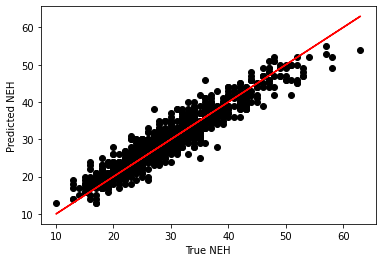

In [65]:
# poly model
interaction = PolynomialFeatures(
    degree = 1, 
	include_bias = False, interaction_only = True)
interaction_x = interaction.fit_transform(X_train)

# linear regression
regression = LinearRegression()

# Fit the linear regression
model = regression.fit(interaction_x, y_train)

#predict
ypred=model.predict(interaction.transform(X_test))
ypred=[round(y) for y in ypred]


print("MAPE=",metrics.mean_absolute_percentage_error(y_test, ypred),"\nRMSE=",metrics.mean_squared_error(y_test, ypred)**0.5)
print("corr",np.corrcoef(y_test,ypred,)[1][0])
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,ypred,c='k')
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

In [68]:
print(len(model.coef_))
model.coef_

78


array([ 3.15214606e+03,  3.15366052e+03,  2.98990567e+03,  3.96232239e+03,
       -1.10326054e+02,  9.40249146e+03, -5.39223102e+13, -5.39223102e+13,
       -5.39223102e+13, -5.39223102e+13, -5.39223102e+13, -5.39223102e+13,
       -8.91192631e+13, -8.91192631e+13, -8.91192631e+13, -8.91192631e+13,
       -8.91192631e+13, -8.91192631e+13, -6.68767084e+13, -6.68767084e+13,
       -6.68767084e+13, -6.68767084e+13, -6.68767084e+13, -6.68767084e+13,
        1.54862650e+14,  1.54862650e+14,  1.54862650e+14,  1.54862650e+14,
        1.54862650e+14,  1.54862650e+14, -5.46132432e+13, -5.46132432e+13,
       -5.46132432e+13, -5.46132432e+13, -5.46132432e+13, -5.46132432e+13,
       -9.23923957e+13, -9.23923957e+13, -9.23923957e+13, -9.23923957e+13,
       -9.23923957e+13, -9.23923957e+13, -1.13136123e+14, -1.13136123e+14,
       -1.13136123e+14, -1.13136123e+14, -1.13136123e+14, -1.13136123e+14,
       -3.02060145e+13, -3.02060145e+13, -3.02060145e+13, -3.02060145e+13,
       -3.02060145e+13, -

MAPE= 0.06508137447929398 
RMSE= 2.396766529288651
corr 0.9571984564741195


Text(0, 0.5, 'Predicted NEH')

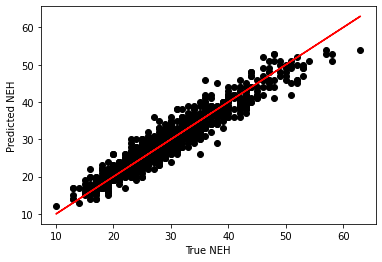

In [56]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X_train, y_train)
ypred=svr_rbf.predict(X_test)
ypred=[round(y) for y in ypred]
metrics.mean_absolute_percentage_error(y_test, ypred)

print("MAPE=",metrics.mean_absolute_percentage_error(y_test, ypred),"\nRMSE=",metrics.mean_squared_error(y_test, ypred)**0.5)
print("corr",np.corrcoef(y_test,ypred,)[1][0])
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,ypred,c='k')
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

MAPE= 0.06808538269828701 
RMSE= 2.557422171497171
corr 0.9511262526062199


Text(0, 0.5, 'Predicted NEH')

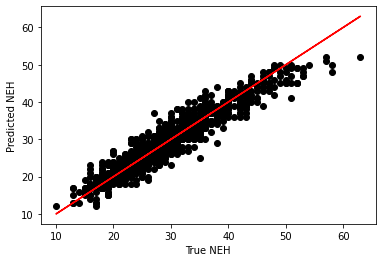

In [57]:
svr_lin.fit(X_train, y_train)
ypred=svr_lin.predict(X_test)
ypred=[round(y) for y in ypred]
metrics.mean_absolute_percentage_error(y_test, ypred) #mean_squared_error

print("MAPE=",metrics.mean_absolute_percentage_error(y_test, ypred),"\nRMSE=",metrics.mean_squared_error(y_test, ypred)**0.5)
print("corr",np.corrcoef(y_test,ypred,)[1][0])
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,ypred,c='k')
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

MAPE= 0.069433429565513 
RMSE= 2.6200171365696003
corr 0.949163891981204


Text(0, 0.5, 'Predicted NEH')

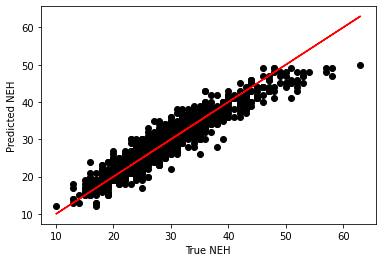

In [58]:
svr_poly.fit(X_train, y_train)
ypred=svr_poly.predict(X_test)
ypred=[round(y) for y in ypred]
metrics.mean_absolute_percentage_error(y_test, ypred)

print("MAPE=",metrics.mean_absolute_percentage_error(y_test, ypred),"\nRMSE=",metrics.mean_squared_error(y_test, ypred)**0.5)
print("corr",np.corrcoef(y_test,ypred,)[1][0])
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,ypred,c='k')
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

MAPE= 0.06876291358334569 
RMSE= 2.5679341335567223
corr 0.9508294893313086


Text(0, 0.5, 'Predicted NEH')

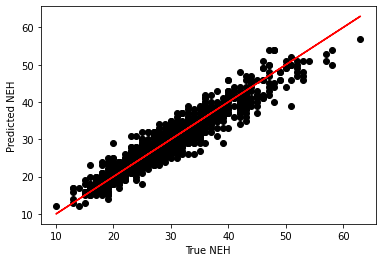

In [59]:
import xgboost 
model = xgboost.XGBRegressor(n_estimators=400, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(np.array(X_train), y_train)
ypred=model.predict(np.array((X_test)))
ypred=[round(y) for y in ypred]
# print(metrics.mean_absolute_percentage_error(y_test, ypred),metrics.mean_squared_error(y_test, ypred)**0.5)

print("MAPE=",metrics.mean_absolute_percentage_error(y_test, ypred),"\nRMSE=",metrics.mean_squared_error(y_test, ypred)**0.5)
print("corr",np.corrcoef(y_test,ypred,)[1][0])
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,ypred,c='k')
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

MAPE= 0.06513749933488472 
RMSE= 2.4052663308766826


Text(0, 0.5, 'Predicted NEH')

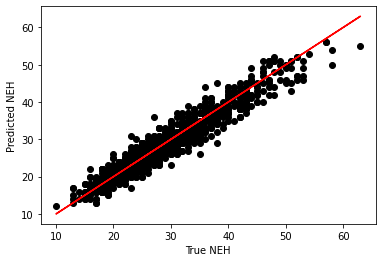

In [60]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization 
 
# define base model
 
model = Sequential()
model.add(Dense(128, input_shape=(78,), kernel_initializer='normal', activation='relu'))
model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
# model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam') 

# model.fit(np.array(interaction.transform(X_train)).astype(np.float32), y_train.astype(np.float32),epochs=200,batch_size=50,validation_split=0.2)
# ypred=model.predict(np.array(interaction.transform(X_test)).astype(np.float32))
# ypred=[round(y) for y in ypred.ravel()]

history=model.fit(np.array((X_train)).astype(np.float32), y_train.astype(np.float32),epochs=400,batch_size=100,validation_split=0.2,verbose=0)
ypred=model.predict(np.array((X_test)).astype(np.float32))
ypred=[round(y) for y in ypred.ravel()]


print("MAPE=",metrics.mean_absolute_percentage_error(y_test, ypred),"\nRMSE=",metrics.mean_squared_error(y_test, ypred)**0.5)
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,ypred,c='k')
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               10112     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 20,993
Trainable params: 20,993
Non-trainable params: 0
_________________________________________________________________


MAPE= 0.06513749933488472 
RMSE= 2.4052663308766826
corr 0.9575156859709916


Text(0, 0.5, 'Predicted NEH')

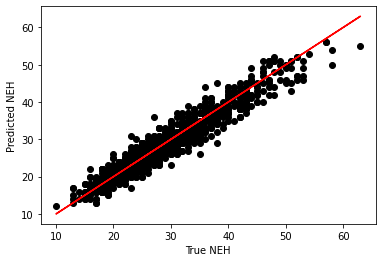

In [62]:
print("MAPE=",metrics.mean_absolute_percentage_error(y_test, ypred),"\nRMSE=",metrics.mean_squared_error(y_test, ypred)**0.5)
print("corr",np.corrcoef(y_test,ypred,)[1][0])
plt.plot(y_test,y_test,c='r')
plt.scatter(y_test,ypred,c='k')
plt.xlabel("True NEH")
plt.ylabel("Predicted NEH")

In [63]:
pd.DataFrame([y_test,ypred]).transpose().corr()

,0,1
0,1.000000,0.957516
1,0.957516,1.000000


In [64]:
TEST=pd.DataFrame([y_test,ypred]).transpose()
TEST.columns=["NEH","pNEH"]
TEST.head(25)

,NEH,pNEH
0,23.0,25.0
1,30.0,27.0
2,33.0,32.0
3,37.0,34.0
4,17.0,19.0
5,25.0,22.0
6,33.0,32.0
7,27.0,25.0
8,19.0,18.0
9,15.0,18.0
